# CAP 5415 Assignment 1
&emsp; Daniel Silva

In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import pandas as pd

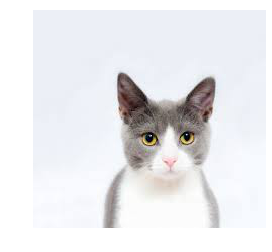

In [2]:
image = plt.imread('image.png', 0)
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
image.shape

(217, 232, 3)

## Rotation of RGB Image

In [4]:
def rotate_coords(x, y, angle, origin_x, origin_y):
    '''
    Rotates coordinates x and y about points origin_x and origin_y, by a given angle
    Uses the rotation matrix equation
    '''
    
    radians = angle * np.pi / 180
    sin, cos = np.sin(radians), np.cos(radians)
    
    # x and y relative from origin
    x, y = np.asarray(x) - origin_x, np.asarray(y) - origin_y
    
    # Rotate points about origin
    new_x = x*cos - y*sin
    new_y = x*sin + y*cos
    
    # Return rotated points, restored to original origin
    return new_x + origin_x, new_y + origin_y

In [5]:
def rotate_image(image, angle, file_name=None):
    '''
    Rotates an image about its center by a given angle
    
    image: input image to rotate
    angle: float or int, angle of translation
    file_name: file name to save output image as
    '''   
    # We need to use the negatative angle since images have origin in top left corner
    angle = -angle
    
    height, width = image.shape[0:2]
    
    origin_x = width // 2
    origin_y = height // 2
    
    # Rotate far corners of image to get size of rotated image
    x_corners, y_corners = rotate_coords([0, width, width, 0], [0, 0, height, height], angle, origin_x, origin_y)
    rotated_width = int(np.ceil(x_corners.max() - x_corners.min()))
    rotated_height = int(np.ceil(y_corners.max() - y_corners.min()))
    
    # Grid of coordinates for rotated pixels
    xs, ys = np.meshgrid(np.arange(rotated_width), np.arange(rotated_height))
    
    # Rotate coordinates
    rotated_xs, rotated_ys = rotate_coords(xs + x_corners.min(), ys + y_corners.min(), -angle, origin_x, origin_y)
    rotated_xs, rotated_ys = rotated_xs.round().astype(int), rotated_ys.round().astype(int)
    
    # Mask for valid coordinates.
    valid = (0 <= rotated_xs) & (rotated_xs < width) & (0 <= rotated_ys) & (rotated_ys < height)
    
    # Create destination image
    rotated_image = np.empty(shape=(rotated_height, rotated_width, 3), dtype='uint8')

    # Copy valid coordinates from source image
    rotated_image[ys[valid], xs[valid]] = image[rotated_ys[valid], rotated_xs[valid]]
    
    # Fill borders with white
    rotated_image[ys[~valid], xs[~valid]] = 255
    
    if file_name != None:
        img.imsave(file_name, rotated_image)

    return rotated_image

In [65]:
rotated_image = rotate_image(image, 60, 'output1.png')

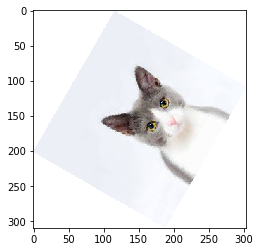

In [66]:
plt.imshow(rotated_image)

## Scaling 

In [67]:
def scale_image(image, shape = None, factor = None, file_name=None):
    '''
    Scales an image using nearest neighbor interpolation
    
    image: input image to scale
    shape: tuple of (height, width), shape to scale image to
    factor: float or int, value to scale image by in both directions
    file_name: string, file name to save output as 
    '''  
    
    # Grabbing original image shape
    height, width = image.shape[0:2]
    
    if shape != None:
        scaled_height, scaled_width = shape[0], shape[1]
    elif factor != None:
        scaled_height = int(np.round(height * factor))
        scaled_width = int(np.round(width * factor))
    else:
        raise ValueError('Please provide a shape or factor to scale your image to')
        
    # Creating empty output image
    scaled_image = np.empty(shape = (scaled_height, scaled_width, 3), dtype='uint8')
    
    # Loop to set each pixel in the scaled image
    for x in range(scaled_width):
        for y in range(scaled_height):
            
            # Using nearest neighbor algorithm to decide which pixel to copy from the original image
            source_x = int(np.round((x / scaled_width) * width))
            source_y = int(np.round((y / scaled_height) * height))
            
            # Ensuring we don't go out of bounds 
            source_x, source_y = min(source_x, width - 1), min(source_y, height - 1)
            
            # Copy pixels
            scaled_image[y, x] = image[source_y, source_x]
            
    
    if file_name != None:
        img.imsave(file_name, scaled_image)

    return scaled_image

In [68]:
scaled_image = scale_image(image, factor = 1.5, file_name = 'output2.png')

In [69]:
image.shape

(217, 232, 3)

In [70]:
scaled_image.shape

(326, 348, 3)

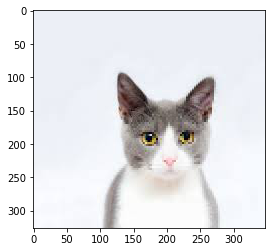

In [72]:
plt.imshow(scaled_image)

### Translation 

In [90]:
def translate_image(image, X, Y, file_name=None):
    ''' 
    Translates an image by X and Y pixels
    
    image: input image to translate
    X: number of pixels to translate in the horizontal direction
    Y: number of pixels to translate in the vertical direction
    file_name: string, file name to save output as 
    '''
    
    # Need to invert Y since images have origin in top left in python
    Y = -Y
    
    # Get original shape and shape after the image is translated
    height, width = image.shape[0:2]
    trans_height, trans_width = height + np.abs(Y), width + np.abs(X)
    
    # Coordinate grid of the original image
    xs, ys = np.meshgrid(np.arange(width), np.arange(height))
    
    # Create empty array to fit our translated image
    # Using the translated shape allows us to fit the entire original image into the new matrix
    translated_image = np.empty(shape=(trans_height, trans_width, 3), dtype='uint8')
    
    # Calculating the translated grid of coordinates
        # If translating in negative direction, no need to update coordinates
        # Simply copying the original image into a larger grid will do the job
    trans_xs = xs + X if X >= 0 else xs
    trans_ys = ys + Y if Y >= 0 else ys
    
    # Copy image pixels to translated location 
    translated_image[trans_ys, trans_xs] = image[ys, xs]
    
    # Filling empty pixels with white
    if X > 0:
        translated_image[:, :X] = 0
    else:
        translated_image[:, X:] = 0
        
    if -Y > 0:
         translated_image[Y:, :] = 0
    else:
         translated_image[:Y, :] = 0
            
    if file_name != None:
        img.imsave(file_name, translated_image)
        
    return translated_image

In [94]:
translated_image = translate_image(image, -40, -60, 'output3.png')

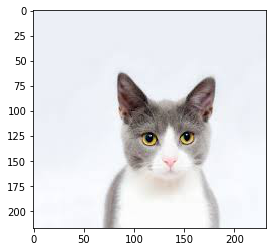

In [95]:
plt.imshow(image)

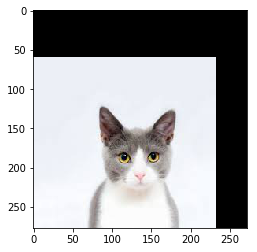

In [96]:
plt.imshow(translated_image)

## Xh = b Least Squares Solution

Finding the least squares solution <strong>h</strong>, which minimizes the error: **e = Xh - b**

Least Squares Equation (where h is an estimation):
### **X<sup>T</sup>Xh =X<sup>T</sup>b**

In [6]:
data = pd.read_csv('data.txt', sep=',   ', engine='python')

In [7]:
X = np.array(data[:][:20])
X.shape

(20, 5)

In [8]:
b = data[:][20:]
b.drop(['x2', 'x3', 'x4', 'x5'], axis=1, inplace=True)
b.columns = ['b']
b = np.array(b)
b.shape

(20, 1)

**Finding X<sup>T</sup>X:**

In [9]:
Xtransp_X = np.matmul(X.transpose(), X)

**Finding X<sup>T</sup>b**

In [10]:
Xtransp_b = np.matmul(X.transpose(), b)

Solving for h in **X<sup>T</sup>Xh =X<sup>T</sup>b** using augmented matrix

In [11]:
h = np.linalg.solve(Xtransp_X, Xtransp_b)

In [12]:
h

array([[ 0.11816006],
       [ 0.43006877],
       [-0.14024456],
       [ 0.26235196],
       [ 0.34986115]])

Now that we have h, we can find the error: **e = Xh - b**

In [84]:
e = np.matmul(X,h) - b

**Norm of the error vector:**

In [85]:
norm = np.linalg.norm(e)
print('Error norm: {}'.format(norm))

Error norm: 1.2131431347004435


## Gradient Descent  

In [86]:
def gradient_descent(X, b, lr, epochs):
    '''
    Applies gradient descent to find a solution h which minimizes the norm of the error, e = Xh - b
    Returns the solution matrix, h, and an array containing the norm of the error in each iteration
    '''   
    
    # Initiate h with random numbers
    np.random.seed(42)
    h = np.random.rand(5).reshape(5,1)
    
    norms = []
    
    # Iterate through epochs
    for i in range(epochs):
        
        # Calculate and store epoch error
        e = np.matmul(X, h) - b
        norm = np.linalg.norm(e)
        norms.append(norm)
        
        # Calculate gradient of error and update weights accordingly
        h = h - lr * np.matmul(X.transpose(), e)
        
    return h, np.array(norms)

In [87]:
h, norms = gradient_descent(X, b, .08, 100)
gradient_descent_min_norm = norms[-1]

MMSE Solution Error Norm:    1.2131431347004435
Gradient Descent Error Norm: 1.213143160277134


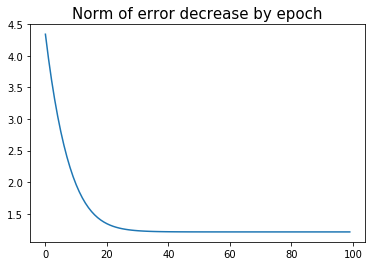

In [88]:
print('MMSE Solution Error Norm:    {}\nGradient Descent Error Norm: {}'.format(norm, gradient_descent_min_norm))
plt.plot(norms)
plt.title('Norm of error decrease by epoch', fontsize = 15)
plt.show()

With just over 220 epochs, gradient descent acheives essentially the same error norm as least squares

In [89]:
h, norms = gradient_descent(X, b, .08, 220)
print('Least Squares Error Norm:    {}\nGradient Descent Error Norm: {}'.format(norm, norms[-1]))

Least Squares Error Norm:    1.2131431347004435
Gradient Descent Error Norm: 1.2131431347004435
